# Mapas

[Cartopy](https://scitools.org.uk/cartopy/) es un paquete de Python diseñado para el procesamiento de datos geoespaciales, para su análisis y representación a través de mapas.

Cartopy utiliza las librerías [PROJ.4](https://proj.org/), NumPy and [Shapely](https://shapely.readthedocs.io/) e incluye una interfaz basada en Matplotlib para la creación de mapas de alta calidad.

Para cada Mapa, lo primero es definir la [proyección](https://bl.ocks.org/syntagmatic/ba569633d51ebec6ec6e), que define un sistema coordenado de referencia ([CCRS](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html): Cartopy Coordinate Reference Systems).

### Instalación del módulo Cartopy en AWS/Linux/conda

```bash
$ conda config --set channel_priority false
$ conda update --all --yes
$ conda install -c conda-forge cartopy
```

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
import io
from urllib.request import urlopen, Request
from PIL import Image

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy

import shapely.geometry as sgeom

/home/ubuntu/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


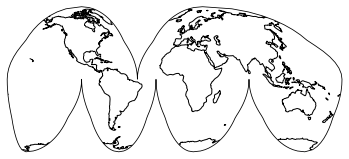

In [15]:
# Crea una nueva figura (usada para el mapa), y la hace activa:
plt.figure()
# Agregar una nueva ventana (ejes) a la figura, definiendo el tipo de proyección que se utilizará 
ax = plt.axes(projection = ccrs.InterruptedGoodeHomolosine())
# Define que en esta ventana se usen bordes de las costas
ax.coastlines()
# plt.savefig('coastlines.pdf')  # Grabar el mapa (o en .png) ANTES de plt.show()
# Muestra la figura (mapa) embebida en el notebook
plt.show()
# Cierra la figura, asi se libera la memoria
plt.close()

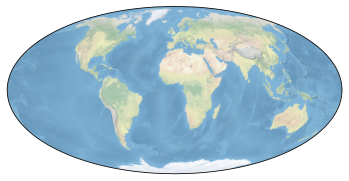

In [16]:
plt.figure()
ax = plt.axes(projection = ccrs.Mollweide())
# Define que en esta ventana se usen imágenes 
# las imágenes son de https://www.naturalearthdata.com/downloads/50m-raster-data/50m-natural-earth-2/
ax.stock_img()
plt.show()
plt.close()

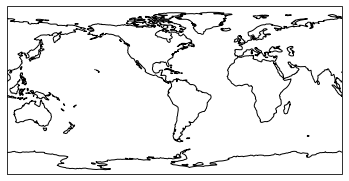

In [17]:
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = -74))
ax.coastlines()

plt.show()
plt.close()

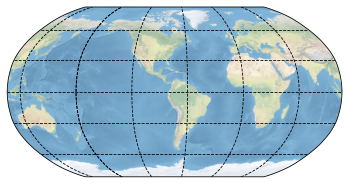

In [18]:
plt.figure()
ax = plt.axes(projection = ccrs.Robinson(central_longitude = -74))
ax.stock_img()

ax.gridlines(color='black', linestyle='--')

plt.show()
plt.close()

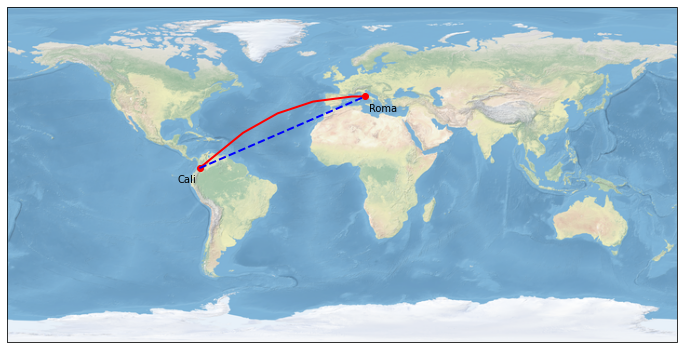

In [19]:
# Crea una nueva figura, definiendo un tamaño diferente al default: [6.4, 4.8]
plt.figure(figsize = [12, 9])
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()

cali_lon, cali_lat = -76.59, 3.39
roma_lon, roma_lat = 12.39, 41.90

plt.plot([cali_lon, roma_lon], [cali_lat, roma_lat], 
         color = 'red', linewidth = 2, marker = 'o', 
         transform = ccrs.Geodetic(),
         )

plt.plot([cali_lon, roma_lon], [cali_lat, roma_lat],
         color = 'blue', linewidth = 2, linestyle = '--',
         transform = ccrs.PlateCarree(),
         )

plt.text(cali_lon - 2, cali_lat - 8, 'Cali',
         horizontalalignment = 'right',
         transform = ccrs.Geodetic())

plt.text(roma_lon + 2, roma_lat - 8, 'Roma',
         horizontalalignment = 'left',
         transform = ccrs.Geodetic())

plt.show()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


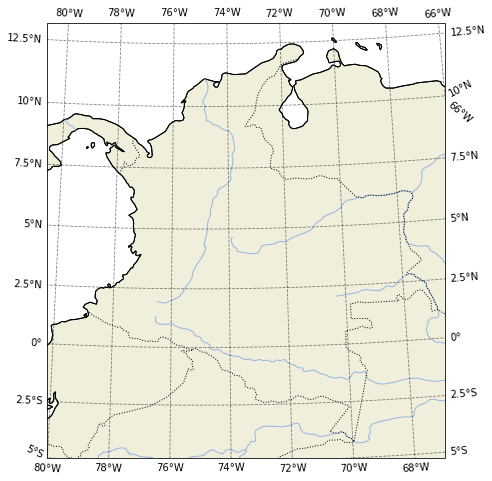

In [20]:
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = ccrs.AlbersEqualArea(-75, 7.5))
ax.set_extent([-80, -67, -5, 13])

ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, edgecolor = 'black')
# ax.add_feature(cf.OCEAN)
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.BORDERS, linestyle=':')

ax.gridlines(draw_labels = True, color = 'black', alpha = 0.5, linestyle = '--')

plt.show()
plt.close()

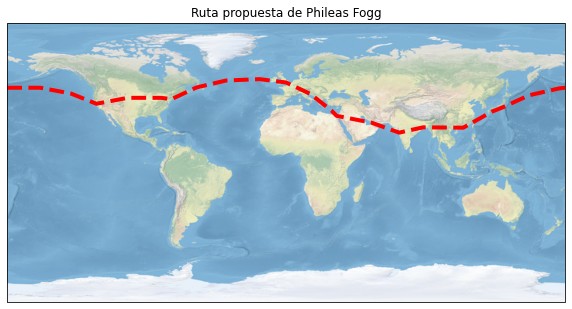

In [21]:
plt.figure(figsize = [10, 8])
ax = plt.axes(projection = ccrs.PlateCarree())
# ax.coastlines()

ax.stock_img()
ax.set_title("Ruta propuesta de Phileas Fogg")

places = {
    'londres': [-0.1276474, 51.5073219],
    'suez': [32.537086, 29.974498],
    'bombay': [72.8882172, 19.1334321],
    'calcuta': [88.3476023, 22.5677459],
    'hong kong': [114.1628131, 22.2793278],
    'yokohama': [139.636768, 35.444991],
    'san francisco': [-122.4629897, 37.7647993],
    'new york': [-73.9866136, 40.7306458]}

destinations = [
    'londres', 'suez', 'bombay', 'calcuta', 'hong kong',
    'yokohama', 'san francisco', 'new york', 'londres']

lons, lats = zip( *[ (places[place][0], places[place][1]) for place in destinations ] )

ax.plot(lons, lats,
        linestyle = '--', color = 'red', linewidth = 4,
        transform = ccrs.Geodetic())

plt.show()
plt.close()